In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
df = pd.read_csv('/Users/albert/Documents/GitHub/housing_analysis/house-data/train.csv')

In [4]:
df = df[ df.select_dtypes(include=np.number).columns.tolist()]

In [5]:
df.dropna(inplace=True)

In [ ]:
#GrLivArea: Above grade (ground) living area square feet

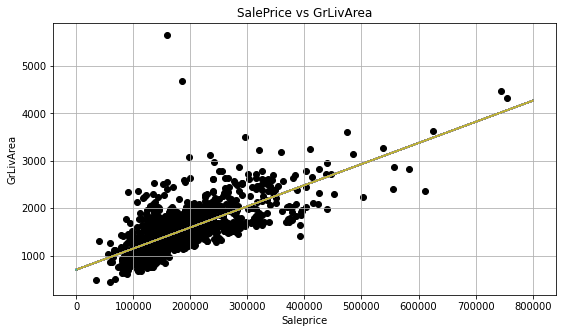

In [6]:
deg = 1
data_reg = np.polyfit(df["SalePrice"], df["GrLivArea"], deg)
#xp = np.linspace(0.0,1.75,156)
xp = np.linspace(1,50*(8*(10**5), 30))
yp = np.polyval(data_reg, xp)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
ax.scatter(df["SalePrice"], df["GrLivArea"], label = "SalePrice vs GrLivArea", color="black")
ax.plot(xp, yp, label="Pol. Reg.")
ax.set_title("SalePrice vs GrLivArea")
ax.set_xlabel("Saleprice")
ax.set_ylabel("GrLivArea")
ax.grid()